# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Anggun Sulis Setyawan
- **Email:** sul191120@gmail.com
- **ID Dicoding:** sulbae

## Menentukan Pertanyaan Bisnis

1) Bagaimana performa penjualan bulanan e-commerce year-to-date (tahun 2018)?
2) Kategori produk apa yang paling banyak terjual selama periode puncak trend penjualan tahun 2018?

## Import Semua Packages/Library yang Digunakan

In [123]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### users

In [124]:
# customers_dataset
customers_df = pd.read_csv('./e-commerce-dataset/customers_dataset.csv')
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- dataset customers berisi **99.441 baris data dan 5 kolom**.

In [125]:
# sellers_dataset
sellers_df = pd.read_csv('./e-commerce-dataset/sellers_dataset.csv')
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight:**
- dataset sellers berisi **3.095 baris data dan 4 kolom**.

#### orders

In [126]:
# orders_dataset
orders_df = pd.read_csv('./e-commerce-dataset/orders_dataset.csv')
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- dataset orders berisi **99.441 baris data dan 8 kolom**.

In [127]:
# order_items_dataset
order_items_df = pd.read_csv('./e-commerce-dataset/order_items_dataset.csv')
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- dataset order_items berisi **112.650 baris data dan 7 kolom**.

In [128]:
# order_payments_dataset
order_payments_df = pd.read_csv('./e-commerce-dataset/order_payments_dataset.csv')
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight:**
- dataset order_payments berisi **103.886 baris data dan 5 kolom**.

In [129]:
# order_reviews_dataset
order_reviews_df = pd.read_csv('./e-commerce-dataset/order_reviews_dataset.csv')
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Insight:**
- dataset order_items berisi **99.224 baris data dan 7 kolom**.

#### products

In [130]:
# products_dataset
products_df = pd.read_csv('./e-commerce-dataset/products_dataset.csv')
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- dataset products berisi **32.951 baris data dan 9 kolom**.

In [131]:
# product_category_name_translation_dataset
product_cat_df = pd.read_csv('./e-commerce-dataset/product_category_name_translation.csv')
product_cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight:**
- dataset product_cat berisi **71 baris data dan 2 kolom**.

### Assessing Data

#### customers_df

In [132]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [133]:
print(customers_df.shape[0])
print(customers_df['customer_unique_id'].nunique())
print(customers_df['customer_id'].nunique())

99441
96096
99441


In [134]:
# Cek missing values
print("Missing values: ", customers_df.isnull().sum().sum())
# Cek duplikasi data
print("Duplicate values: ", customers_df.duplicated().sum())

Missing values:  0
Duplicate values:  0


**Insight:**
1) `customer_id` merupakan **primary key (PK)**
    - `customer_id` berperan sebagai nomor identitas akun yang digunakan pengguna, sedangkan `customer_unique_id` berperan sebagai identifier pengguna. 
    - Kolom `customer_id` memiliki jumlah nilai unik yang sesuai dengan total jumlah baris data, sedangkan jumlah nilai unik `customer_unique_id` kurang dari total jumlah baris data.
2) Tidak ada _missing value_ maupun _duplikasi data_.

#### sellers_df

In [135]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [136]:
# Cek missing values
print("Missing values: ", sellers_df.isnull().sum().sum())
# Cek duplikasi data
print("Duplicate values: ", sellers_df.duplicated().sum())

Missing values:  0
Duplicate values:  0


**Insight:**
- `seller_id` merupakan **primary key (PK)**
- Tidak ada _missing value_ maupun _duplikasi data_.

#### orders_df

In [137]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [138]:
print(orders_df.shape[0])
print(orders_df['order_id'].nunique())

99441
99441


In [139]:
# Cek missing values
print("Missing values: ", orders_df.isnull().sum().sum())
print(orders_df.isnull().sum())
# Cek duplikasi data
print("Duplicate values: ", orders_df.duplicated().sum())

Missing values:  4908
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Duplicate values:  0


In [140]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- `order_id` merupakan **primary key (PK)**
- `customer_id` merupakan **foreign key (PK)** ke dataset customers.
- Terdapat 4908 missing values pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`.
- Tidak ada duplikasi data.
- Data kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` perlu diubah tipe datanya menjadi **datetime**.

#### order_items_df

In [141]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [142]:
print(order_items_df.shape[0])
print(order_items_df['order_id'].nunique())
print(order_items_df['order_item_id'].nunique())

112650
98666
21


In [143]:
# Cek missing values
print("Missing values: ", order_items_df.isnull().sum().sum())
# Cek duplikasi data
print("Duplicate values: ", order_items_df.duplicated().sum())

Missing values:  0
Duplicate values:  0


In [144]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- `order_id` dan `order_item_id` merupakan **composite primary key (PK)**
- `product_id` merupakan **foreign key (PK)** ke dataset product.
- `seller_id` merupakan **foreign key (PK)** ke dataset seller.
- Tidak ada missing values maupun duplikasi data.
- tipe data `shipping_limit_date` perlu diubah menjadi **datetime**.

#### order_payments_df

In [145]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [146]:
# Cek missing values
print("Missing values: ", order_payments_df.isnull().sum().sum())
# Cek duplikasi data
print("Duplicate values: ", order_payments_df.duplicated().sum())

Missing values:  0
Duplicate values:  0


**Insight:**
- `order_id` merupakan **primary key (PK)**
- Tidak ada missing values maupun duplikasi data.

#### order_reviews_df

In [147]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [148]:
# Cek missing values
print("Missing values: ", order_reviews_df.isnull().sum().sum())
print(order_reviews_df.isnull().sum())
# Cek duplikasi data
print("Duplicate values: ", order_reviews_df.duplicated().sum())

Missing values:  145903
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Duplicate values:  0


**Insight:**
- `review_id` merupakan **primary key (PK)**
- `order_id` merupakan **foreign key (PK)** ke dataset orders.
- Terdapat 145.903 missing values dari kolom `review_comment_title` dan `review_comment_message`. Hal ini menunjukkan bahwa user sudah memberikan review score, hanya saja tidak menjelaskan ulasan lebih detail. Sehingga cukup gunakan data `review_score`.
- Tidak ada duplikasi data.

#### products_df

In [149]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [150]:
# Cek missing values
print("Missing values: ", products_df.isnull().sum().sum())
print(products_df.isnull().sum())
# Cek duplikasi data
print("Duplicate values: ", products_df.duplicated().sum())

Missing values:  2448
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
Duplicate values:  0


**Insight:**
- `product_id` merupakan **primary key (PK)**
- `product_category_name` merupakan **foreign key (PK)** ke dataset product category.
- Terdapat 2.448 missing values dari kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, dan `review_comment_message`.
- Tidak ada duplikasi data.

#### product_cat_df

In [151]:
product_cat_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [152]:
# Cek missing values
print("Missing values: ", product_cat_df.isnull().sum().sum())
# Cek duplikasi data
print("Duplicate values: ", product_cat_df.duplicated().sum())

Missing values:  0
Duplicate values:  0


**Insight:**
- `product_category_name` merupakan **primary key (PK)**

### Cleaning Data

#### orders_df

In [153]:
# missing values handling
orders_df.dropna(inplace=True)

In [154]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [155]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [156]:
# Ubah tipe data ke datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [157]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


**Insight:**
- _missing values handling_ pada kolom date dilakukan dengan menghapus baris data yang tidak lengkap tersebut. Karena jumlah baris dengan _missing values_ tidak terlalu signifikan terhadap total data, maka cara ini masih aman.
- Data waktu sudah memiliki tipe data yang sesuai. Selanjutnya, dapat diolah sesuai kebutuhan.

#### order_items_df

In [158]:
# Ubah tipe data ke datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [159]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Data waktu sudah memiliki tipe data yang sesuai. Selanjutnya, dapat diolah sesuai kebutuhan.

#### products_df

In [160]:
# missing values handling
products_df.dropna(inplace=True)

In [161]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight:**
- _missing values handling_ dilakukan dengan menghapus baris data yang tidak lengkap tersebut. Jumlah baris data dengan _missing values_ relatif sedikit dibandingkan jumlah total data, maka cara ini masih aman.

## Exploratory Data Analysis (EDA)

### Analisis Trend Penjualan sepanjang tahun 2018

#### Merge Data

In [162]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [163]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [164]:
# Merge dataset orders_df, order_items_df
orders_detail_df = pd.merge(left=orders_df, right=order_items_df, 
                            on='order_id', 
                            how='right')

orders_detail_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [165]:
orders_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

#### Cleaning Data

In [166]:
# Cek Missing values
print("Missing values: ", orders_detail_df.isnull().sum())

Missing values:  order_id                            0
customer_id                      2470
order_status                     2470
order_purchase_timestamp         2470
order_approved_at                2470
order_delivered_carrier_date     2470
order_delivered_customer_date    2470
order_estimated_delivery_date    2470
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64


In [167]:
# Drop missing values
orders_detail_df.dropna(inplace=True)

orders_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110180 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110180 non-null  object        
 1   customer_id                    110180 non-null  object        
 2   order_status                   110180 non-null  object        
 3   order_purchase_timestamp       110180 non-null  datetime64[ns]
 4   order_approved_at              110180 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110180 non-null  datetime64[ns]
 6   order_delivered_customer_date  110180 non-null  datetime64[ns]
 7   order_estimated_delivery_date  110180 non-null  datetime64[ns]
 8   order_item_id                  110180 non-null  int64         
 9   product_id                     110180 non-null  object        
 10  seller_id                      110180 non-null  object        
 11  shipp

**Insight:**
- Setelah merge, terdapat baris data yang mengandung null yaitu pada kolom `customer_id`, `order_status`, `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`. Biasanya ini mengindikasikan error pada pencatatan transaksi sehingga dapat dianggap transaksi tidak valid karena status dan waktu transaksi tidak jelas. Oleh karena itu, sebaiknya data dieliminasi dari proses analisis.

#### Feature Selection

In [168]:
# Gunakan kolom secukupnya untuk analisis
transaction_df = orders_detail_df[['order_id', 'order_item_id', 'customer_id', 'order_purchase_timestamp', 'product_id', 'seller_id', 'price', 'freight_value']].copy()
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110180 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  110180 non-null  object        
 1   order_item_id             110180 non-null  int64         
 2   customer_id               110180 non-null  object        
 3   order_purchase_timestamp  110180 non-null  datetime64[ns]
 4   product_id                110180 non-null  object        
 5   seller_id                 110180 non-null  object        
 6   price                     110180 non-null  float64       
 7   freight_value             110180 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 7.6+ MB


In [169]:
transaction_df['order_id'].nunique()

96461

#### Feature Engineering

In [170]:
transaction_df['sales'] = transaction_df['price'] + transaction_df['freight_value']
transaction_df.head()

,order_id,order_item_id,customer_id,order_purchase_timestamp,product_id,seller_id,price,freight_value,sales
0,00010242fe8c5a6d1ba2dd792cb16214,1,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,218.04


#### Filter Data

In [171]:
sales_2018_df = transaction_df[transaction_df['order_purchase_timestamp'].dt.year == 2018]
sales_2018_df.head()

,order_id,order_item_id,customer_id,order_purchase_timestamp,product_id,seller_id,price,freight_value,sales
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,25.78
7,000576fe39319847cbb9d288c5617fa6,1,9ed5e522dd9dd85b4af4a077526d8117,2018-07-04 12:08:27,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,810.00,70.75,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,16150771dfd4776261284213b89c304e,2018-03-19 18:40:33,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,145.95,11.65,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,351d3cb2cee3c7fd0af6616c82df21d3,2018-07-02 13:59:39,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,53.99,11.40,65.39


In [172]:
sales_2018_df.sort_values(by='order_purchase_timestamp', ascending=False, inplace=True)
sales_2018_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_15892\3017094491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2018_df.sort_values(by='order_purchase_timestamp', ascending=False, inplace=True)


,order_id,order_item_id,customer_id,order_purchase_timestamp,product_id,seller_id,price,freight_value,sales
23530,35a972d7f8436f405b56e36add1a7140,1,898b7fee99c4e42170ab69ba59be0a8b,2018-08-29 15:00:37,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,84.99,8.76,93.75
1722,03ef5dedbe7492bdae72eec50764c43f,1,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,24.90,8.33,33.23
9829,168626408cb32af0ffaf76711caae1dc,1,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,45.90,15.39,61.29
4925,0b223d92c27432930dfe407c6aea3041,2,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,255.48
4924,0b223d92c27432930dfe407c6aea3041,1,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,209.00,46.48,255.48


#### Pivot Table: Monthly Sales

In [173]:
monthly_trend_df = sales_2018_df.groupby(sales_2018_df['order_purchase_timestamp'].dt.month)['sales'].sum().reset_index()
monthly_trend_df

,order_purchase_timestamp,sales
0,1,1077887.46
1,2,966212.50
2,3,1120598.24
3,4,1132878.93
4,5,1128774.52
5,6,1011448.96
6,7,1027286.52
7,8,985491.64


In [174]:
# fsesuaikan format bulan 3 huruf pertama
monthly_trend_df['order_purchase_timestamp'] = monthly_trend_df['order_purchase_timestamp'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
monthly_trend_df

,order_purchase_timestamp,sales
0,Jan,1077887.46
1,Feb,966212.50
2,Mar,1120598.24
3,Apr,1132878.93
4,May,1128774.52
5,Jun,1011448.96
6,Jul,1027286.52
7,Aug,985491.64


### Products

In [ ]:
# Ganti nama kategori produk dengan bahasa inggris


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan bulanan e-commerce year-to-date (tahun 2018)?

In [186]:
def sales_trend_viz(x, y, title:str):
    plt.figure(figsize=(12, 6))

    plt.plot(
        x,
        y,
        marker='o',
        linewidth=2,
        color='#72BCD4',
    )

    plt.title(title, fontsize=16, loc="center")

    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.show()

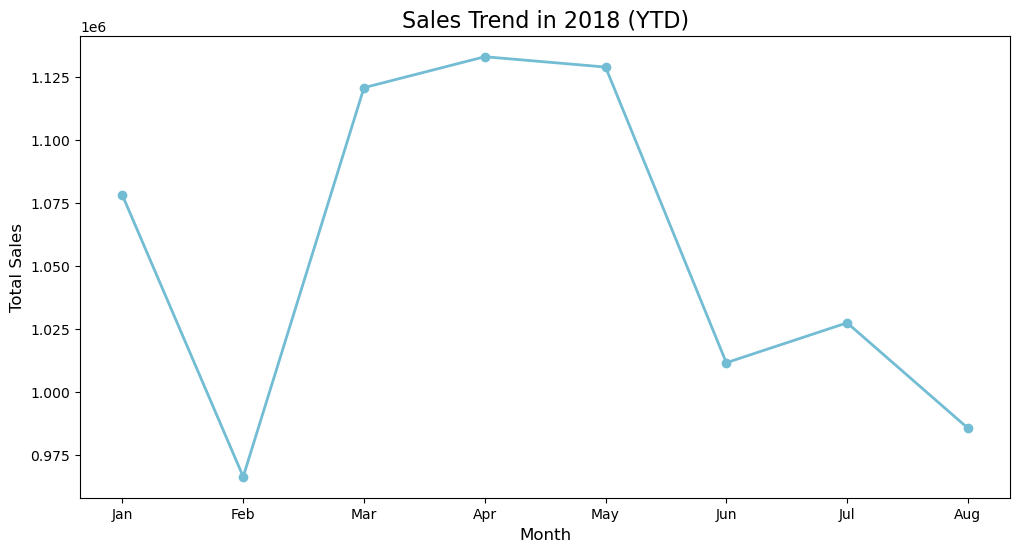

In [187]:
sales_trend_viz(monthly_trend_df['order_purchase_timestamp'], monthly_trend_df['sales'], title='Sales Trend in 2018 (YTD)')

**Insight:**
- xxx
- xxx

### Pertanyaan 2: Kategori produk apa yang paling banyak terjual selama periode puncak trend penjualan tahun 2018?

In [ ]:
def high_sales_cat_viz(data_df):
    plt.figure(figsize=(10, 6))

    colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

    sns.barplot(
        x='product_category_name', 
        y='quantity', 
        data=data_df.head(5), 
        palette=colors
    )
    
    plt.title('Best Selling Product Categories')
    plt.ylabel('Product Category')
    plt.xlabel('Total Orders')
    plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2